# Overall

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import qgrid

from collections import Counter
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [4]:
df_dm    = pd.read_csv('./data/001_demo.csv')
df_train = pd.read_csv('./data/003_train.csv')

In [5]:
df_dm.head()

,id,c0,c1,c2,c3,c4,n0,n1,n2
0,76371,2,7.0,97,0,1,42,NaN,40000.0
1,44326,2,4.0,97,1,1,47,10000.0,175000.0
2,33717,1,3.0,97,1,1,49,122000.0,85000.0
3,96078,2,4.0,98,1,0,37,95000.0,NaN
4,13591,2,3.0,97,0,1,40,NaN,40000.0


In [8]:
df = pd.merge(df_train, df_dm, on='id')
df.head()

,id,label,c0,c1,c2,c3,c4,n0,n1,n2
0,84531,3,2,3.0,97,0,1,40,NaN,40000.0
1,25895,0,2,3.0,98,1,1,38,36000.0,11500.0
2,71109,2,2,3.0,98,0,1,36,NaN,40000.0
3,64666,4,2,3.0,97,1,1,46,78000.0,60000.0
4,91813,8,2,4.0,95,0,1,64,NaN,375000.0


In [10]:
df.set_index('id', inplace=True)

In [14]:
df.head()

,label,c0,c1,c2,c3,c4,n0,n1,n2
id,,,,,,,,,
84531,3,2,3.0,97,0,1,40,NaN,40000.0
25895,0,2,3.0,98,1,1,38,36000.0,11500.0
71109,2,2,3.0,98,0,1,36,NaN,40000.0
64666,4,2,3.0,97,1,1,46,78000.0,60000.0
91813,8,2,4.0,95,0,1,64,NaN,375000.0


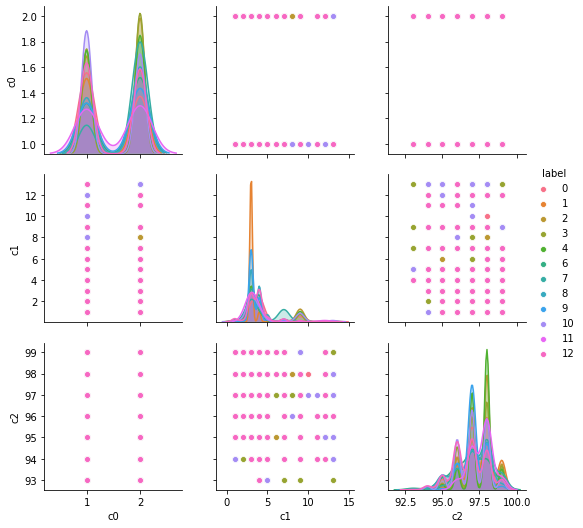

In [18]:
sns.pairplot(df.dropna(), vars=['c0', 'c1', 'c2'], hue='label')

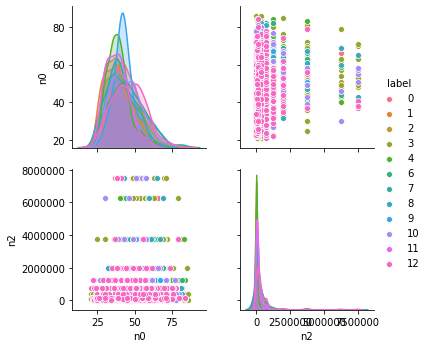

In [24]:
sns.pairplot(df.dropna(), vars=['n0', 'n2'], hue='label')

In [29]:
df = pd.merge(
    df, df_txn.groupby('id').mean(), on='id'
)

In [30]:
df.head()

,label,c0,c1,c2,c3,c4,n0,n1,n2,old_cc_no,old_cc_label,c5,c6,c7,n3,n4,n5,n6,n7
id,,,,,,,,,,,,,,,,,,,
84531,3,2,3.0,97,0,1,40,NaN,40000.0,262011.0,11.0,24.112903,10.564516,52.467742,170.080645,2850.000000,124.951613,357.000000,2474.0
25895,0,2,3.0,98,1,1,38,36000.0,11500.0,36759.0,10.0,21.064286,-2.857143,38.550000,193.950000,1046.428571,113.021429,301.528571,2055.0
71109,2,2,3.0,98,0,1,36,NaN,40000.0,267143.0,10.0,18.493151,-1.657534,34.712329,137.876712,1293.150685,111.821918,309.712329,2705.0
64666,4,2,3.0,97,1,1,46,78000.0,60000.0,9446.0,10.0,34.721519,-2.594937,57.683544,166.037975,1950.632911,117.316456,393.544304,2529.0
91813,8,2,4.0,95,0,1,64,NaN,375000.0,135059.0,12.0,31.070175,-0.947368,57.140351,183.631579,31092.982456,118.929825,329.421053,451.0


In [41]:
df_txn['old_cc_no'].min()

2

In [62]:
df[df['label'] == 3]

,label,c0,c1,c2,c3,c4,n0,n1,n2,old_cc_no,old_cc_label,c5,c6,c7,n3,n4,n5,n6,n7
id,,,,,,,,,,,,,,,,,,,
84531,3,2,3.0,97,0,1,40,NaN,40000.0,262011.000000,11.000000,24.112903,10.564516,52.467742,170.080645,2850.000000,124.951613,357.000000,2474.000000
19755,3,1,3.0,98,0,1,34,NaN,40000.0,67365.600000,10.000000,28.931250,0.506250,47.387500,142.906250,931.875000,120.825000,261.743750,1406.000000
68595,3,1,4.0,99,1,1,27,44000.0,40000.0,246637.000000,0.000000,34.000000,0.078947,58.434211,180.131579,2550.000000,120.973684,473.710526,1753.000000
99988,3,1,4.0,96,0,1,55,NaN,60000.0,234125.000000,12.000000,18.557692,-2.076923,54.769231,152.846154,2709.615385,116.384615,354.057692,2100.000000
75548,3,1,1.0,96,0,1,57,NaN,175000.0,223031.000000,9.000000,14.362319,6.855072,48.550725,177.000000,1057.971014,113.405797,419.869565,3642.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70219,3,1,4.0,95,0,1,68,NaN,175000.0,89024.418919,9.189189,30.486486,16.243243,53.783784,230.270270,1267.567568,127.135135,481.459459,2500.216216
1110,3,1,4.0,97,0,1,48,NaN,3750000.0,196849.000000,12.000000,38.880893,0.607940,58.034739,141.617866,16039.454094,120.732010,361.803970,3194.000000
32898,3,2,7.0,98,0,1,34,NaN,40000.0,30206.266129,10.000000,31.556452,-0.088710,56.169355,192.596774,4761.290323,128.959677,434.693548,1380.000000


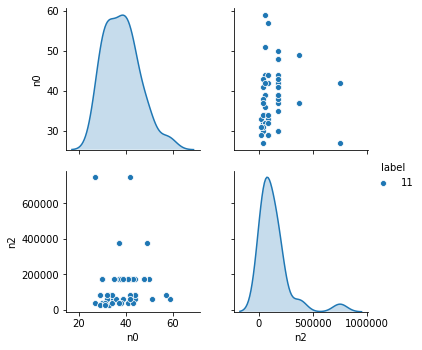

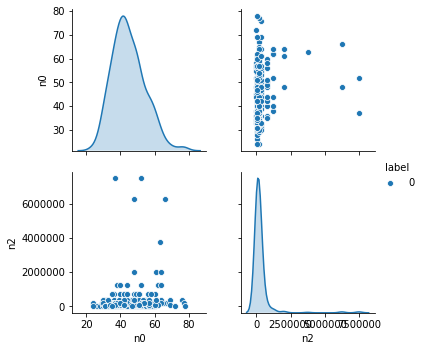

In [61]:
sns.pairplot(df[df['label'] == 11] .dropna(), vars=['n0', 'n2'], hue='label')
sns.pairplot(df[df['label'] == 0] .dropna(), vars=['n0', 'n2'], hue='label')

In [49]:
Counter(df['label']).most_common()

[(3, 27304),
 (2, 22122),
 (10, 19220),
 (4, 17781),
 (12, 6422),
 (1, 2178),
 (8, 1666),
 (6, 953),
 (7, 754),
 (9, 696),
 (0, 691),
 (11, 209),
 (5, 4)]